In [2]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from scripts import *
%store -r df_merged
df_merged.head(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,T,T_a,DD,Ff,N,Nh,Cl,Po,U,Ch,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
2012-11-01,-1.9,-6.0,"Ветер, дующий с северо-запада",3.0,0.0,NaN,NaN,763.7,75.0,NaN,...,NaN,North,4.1,4.1,-4.8,-4.0,-4.0,-4.266667,2.366667,2.366667


In [7]:
import sqlite3 as sql
import pandas as pd

conn = sql.connect('weather.db') # подключение к БД

In [92]:
weather = pd.read_sql('SELECT * FROM df_merged', conn) # выбрать все данные
weather.head(5)

,index,T,T_a,DD,Ff,N,Nh,Cl,Po,U,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
0,2012-11-01 00:00:00,-1.9,-6.0,"Ветер, дующий с северо-запада",3.0,0.0,NaN,None,763.7,75.0,...,None,North,4.1,4.1,-4.8,-4.0,-4.0,-4.266667,2.366667,2.366667
1,2012-11-01 03:00:00,-3.7,-7.0,"Ветер, дующий с северо-запада",2.0,10.0,10.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",764.9,83.0,...,None,North,3.3,3.3,-5.4,-5.8,-4.7,-5.300000,1.600000,1.600000
2,2012-11-01 06:00:00,-5.1,-7.0,"Ветер, дующий с северо-запада",1.0,100.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",766.4,90.0,...,None,North,1.9,1.9,-6.9,-6.4,-7.5,-6.933333,1.833333,1.833333
3,2012-11-01 09:00:00,-6.6,-8.0,"Ветер, дующий с северо-северо-запада",1.0,0.0,NaN,None,767.6,94.0,...,Осадков нет,North,1.4,1.4,-6.9,-7.6,-8.1,-7.533333,0.933333,0.933333
4,2012-11-01 12:00:00,0.9,0.0,"Ветер, дующий с юго-запада",1.0,100.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",768.6,64.0,...,None,West,0.9,0.9,0.0,-0.4,0.0,-0.133333,1.033333,1.033333


In [43]:
t_30 = pd.read_sql('SELECT * FROM df_merged WHERE T < -25', conn)
t_30.head(5)

,index,T,T_a,DD,Ff,N,Nh,Cl,Po,U,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
0,2012-12-02 06:00:00,-25.6,-24.0,"Ветер, дующий с северо-востока",1.0,25.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",760.1,80.0,...,None,East,-1.6,1.6,-27.1,-23.3,-29.6,-26.666667,1.066667,1.066667
1,2012-12-02 09:00:00,-28.7,-24.0,"Ветер, дующий с востоко-северо-востока",2.0,25.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",759.4,79.0,...,Следы осадков,East,-4.7,4.7,-31.4,-25.8,-30.8,-29.333333,0.633333,0.633333
2,2012-12-09 18:00:00,-26.1,-24.0,"Ветер, дующий с северо-северо-востока",2.0,0.0,NaN,None,762.8,85.0,...,None,North,-2.1,2.1,-26.4,-25.4,NaN,NaN,NaN,NaN
3,2012-12-09 21:00:00,-27.2,-26.0,"Ветер, дующий с северо-северо-востока",2.0,0.0,NaN,None,763.0,85.0,...,Следы осадков,North,-1.2,1.2,-27.8,-26.6,-28.1,-27.500000,0.300000,0.300000
4,2012-12-10 00:00:00,-28.1,-27.0,"Ветер, дующий с северо-северо-востока",2.0,0.0,NaN,None,763.8,85.0,...,None,North,-1.1,1.1,-28.6,-27.5,NaN,NaN,NaN,NaN


In [36]:
y_2015 = pd.read_sql('SELECT * FROM df_merged WHERE instr([index], 2015) > 0;', conn)
y_2015.head(5)

,index,T,T_a,DD,Ff,N,Nh,Cl,Po,U,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
0,2015-01-01 00:00:00,-6.1,-5.0,"Ветер, дующий с юго-запада",2.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",743.9,92.0,...,None,West,-1.1,1.1,-5.6,-4.8,-5.9,-5.433333,-0.666667,0.666667
1,2015-01-01 03:00:00,-5.4,-5.0,"Ветер, дующий с юго-юго-запада",1.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",742.8,95.0,...,None,South,-0.4,0.4,-4.6,-4.9,-5.7,-5.066667,-0.333333,0.333333
2,2015-01-01 06:00:00,-5.2,-5.0,"Ветер, дующий с юга",1.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",741.1,93.0,...,None,South,-0.2,0.2,-4.7,-4.9,-5.4,-5.000000,-0.200000,0.200000
3,2015-01-01 09:00:00,-5.2,-5.0,"Ветер, дующий с юга",1.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",739.5,93.0,...,5.0,South,-0.2,0.2,-4.8,-5.0,-6.1,-5.300000,0.100000,0.100000
4,2015-01-01 12:00:00,-4.7,-4.0,"Ветер, дующий с юго-запада",1.0,100.0,60.0,Слоистые разорванные или кучевые разорванные о...,738.1,91.0,...,None,West,-0.7,0.7,-4.5,-4.9,-5.2,-4.866667,0.166667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2015-12-31 09:00:00,-27.2,-28.0,"Штиль, безветрие",0.0,40.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",758.4,80.0,...,Следы осадков,Calm,0.8,0.8,-26.8,-27.3,NaN,NaN,NaN,NaN
946,2015-12-31 12:00:00,-23.6,-27.0,"Штиль, безветрие",0.0,100.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",759.7,79.0,...,None,Calm,3.4,3.4,-25.6,-24.9,NaN,NaN,NaN,NaN
947,2015-12-31 15:00:00,-24.3,-25.0,"Ветер, дующий с севера",1.0,60.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",760.2,80.0,...,None,North,0.7,0.7,-23.4,-23.4,NaN,NaN,NaN,NaN
948,2015-12-31 18:00:00,-25.8,-26.0,"Ветер, дующий с северо-запада",1.0,60.0,0.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",762.0,80.0,...,None,North,0.2,0.2,-24.6,-25.7,NaN,NaN,NaN,NaN


In [37]:
y_2015 = pd.read_sql('SELECT * FROM df_merged WHERE instr([index], 2015) > 0;', conn)
y_2015.to_sql('weather_2015', conn)

In [38]:
y_2015_db = pd.read_sql('SELECT * FROM weather_2015', conn)
y_2015_db.head(5)

,level_0,index,T,T_a,DD,Ff,N,Nh,Cl,Po,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
0,0,2015-01-01 00:00:00,-6.1,-5.0,"Ветер, дующий с юго-запада",2.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",743.9,...,None,West,-1.1,1.1,-5.6,-4.8,-5.9,-5.433333,-0.666667,0.666667
1,1,2015-01-01 03:00:00,-5.4,-5.0,"Ветер, дующий с юго-юго-запада",1.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",742.8,...,None,South,-0.4,0.4,-4.6,-4.9,-5.7,-5.066667,-0.333333,0.333333
2,2,2015-01-01 06:00:00,-5.2,-5.0,"Ветер, дующий с юга",1.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",741.1,...,None,South,-0.2,0.2,-4.7,-4.9,-5.4,-5.000000,-0.200000,0.200000
3,3,2015-01-01 09:00:00,-5.2,-5.0,"Ветер, дующий с юга",1.0,100.0,100.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",739.5,...,5.0,South,-0.2,0.2,-4.8,-5.0,-6.1,-5.300000,0.100000,0.100000
4,4,2015-01-01 12:00:00,-4.7,-4.0,"Ветер, дующий с юго-запада",1.0,100.0,60.0,Слоистые разорванные или кучевые разорванные о...,738.1,...,None,West,-0.7,0.7,-4.5,-4.9,-5.2,-4.866667,0.166667,0.166667


In [95]:
weather['index'] = pd.to_datetime(weather['index'], dayfirst=True)
weather.index = weather['index']
weather = weather.drop(columns=['index'])

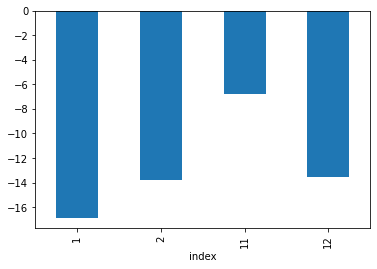

In [109]:
weather.groupby(by=weather.index.month).mean().head()['T'].plot(kind='bar')
plt.show()